# Exercise 3 - Clustering
I denna övning fokuserar vi på unsupervised learning - Machine Learning utan facit. 

Spotify har hört av sig och är irriterade på begreppet "genrer". Genrer är ett utdaterat begrepp som inte reflekterar musikgrupper idag. I Ed Sheerans nya album klassades alla låtar som "Pop", fast att låtarna skiljde sig åt väldigt mycket. De önskar därför att vi skapar en algoritm åt dem som grupperar/clustrar låtar baserat på nya datapunkter. Till vårt befogande har vi fått en fil (spotify.csv) som innehåller ca 33.000 låtar med tillhörande datapunker.

Vår uppgift är att:
1. Tvätta datat.
2. Skala om/normalisera data.
3. Använda K-mean clustering för att skapa grupperingar av data.
4. Visualisera data och jämföra hur våra grupperingar förhåller sig till de utdaterade genrerna.

In [21]:
import pandas as pd
import os
df = pd.read_csv('spotify.csv')

In [22]:
from sklearn import preprocessing
try:
    df.drop(columns={'track_id', 'track_artist', 'track_album_name', 'playlist_id', 'track_name', 'track_album_id', 'playlist_name', 'playlist_genre', 'playlist_subgenre'}, inplace=True)
except:
    pass
# We convert datetime to timestamp in order to get a value showing how new the song is. This value can also be normalized which we love.
df.track_album_release_date = df.track_album_release_date.apply(lambda x: pd.to_datetime(x).timestamp())

# We normalize all of our columns based on Min/Max. This will help our model. We do this by using sklearns module preprocessing.
#x = df.values 
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)
#df = pd.DataFrame(x_scaled, columns=df.columns)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_fit = scaler.fit(df)
df = pd.DataFrame(scaler.transform(df), index=df.index, columns=df.columns)
# or another way of normalizing our dataframe (without external packages)
#df = (df - df.mean()) / df.std()
   
df.dropna(inplace=True)



In [23]:
df

,track_popularity,track_album_release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.941531,0.682380,0.642049,1.201614,0.173200,1.367123,0.876177,-0.481362,-0.333898,-0.377953,-0.809230,0.031908,0.042927,-0.518874
1,0.981557,0.725695,0.490412,0.643317,1.557627,0.585766,0.876177,-0.688642,-0.468670,-0.359177,1.081061,0.782522,-0.777198,-1.056268
2,1.101635,0.687378,0.138889,1.284529,-1.211227,1.100090,-1.141322,-0.324422,-0.436799,-0.377849,-0.519562,0.439384,0.116227,-0.822017
3,0.701374,0.690710,0.435271,1.279002,0.450085,0.984309,0.876177,-0.050024,-0.667642,-0.377911,0.089582,-1.001795,0.039953,-0.947750
4,1.061609,0.658343,-0.033426,0.742815,-1.211227,0.685151,0.876177,-0.702460,-0.432701,-0.377953,-0.692585,0.919777,0.115037,-0.614172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,-0.019096,0.236626,-1.563583,1.234780,-0.934342,1.641519,0.876177,-0.132936,-0.449547,-0.377953,-0.799509,-1.289173,0.270929,-0.358076
32829,-0.899670,0.137622,-0.915679,0.483014,-1.488113,0.755423,0.876177,-0.642251,-0.790531,-0.358910,1.197705,-0.474221,0.266134,2.127922
32830,-1.139827,0.234960,-0.867431,0.676483,0.173200,0.609190,-1.141322,-0.582041,-0.306579,-0.377948,-0.260352,-0.319809,0.264201,-0.262193
32831,-1.099801,0.208781,-0.198848,1.046839,-0.934342,1.123849,0.876177,0.019069,-0.762256,0.188438,0.990337,-0.868829,0.264908,2.367121


## Now to the ML of it all

Eventuella problem (dead kernel) löses genom:

    pip install --upgrade scikit-learn
    pip install --upgrade pandas

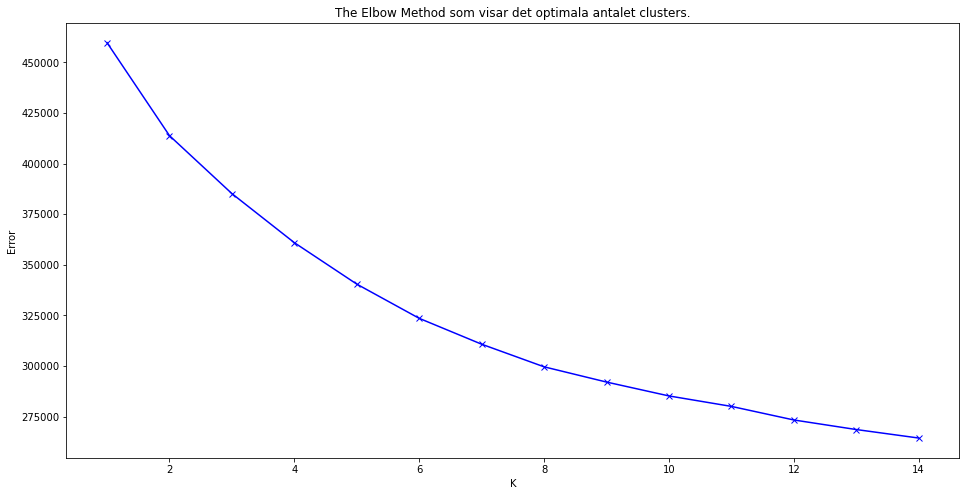

In [24]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Collecting the distortions into list
try:
    df.drop(columns={'Clusters'}, inplace=True)
except:
    pass
distortions = []
K = range(1,15)

for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init=10)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('K')
plt.ylabel('Error')
plt.title('The Elbow Method som visar det optimala antalet clusters.')
plt.show()

In [25]:
# Definera modellen. Vi anser att 3 clusters ser rimligt ut!
kmeans_model = KMeans(n_clusters=3)
kmeans_model.fit(df)
clusters = kmeans_model.predict(df)


/Users/HERUN/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Visualisera clusters med hjälp av PCA
Vi reducerar vår dataframe med en massa dimensioner till endast två dimensioner.

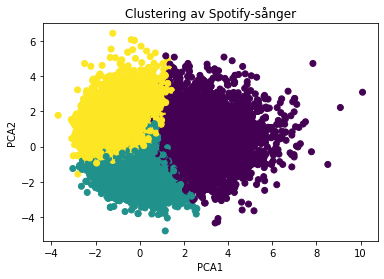

In [26]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Initialize a PCA model with 2 components
df_2d = pca.fit_transform(df)  # Reduce the data to two dimensions using the PCA model

# Plot the data points on a scatter plot
# Coloring the data points according to their cluster assignment
plt.scatter(df_2d[:, 0], df_2d[:, 1], c=clusters)
plt.title('Clustering av Spotify-sånger')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [ ]:
# Model Evaluation
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

print(silhouette_score(df, clusters))
print(davies_bouldin_score(df, clusters))
print(calinski_harabasz_score(df, clusters))